# Week 2: The Kaggle-Titanic dataset
### approaches to machine learning step-by-step

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv', index_col = 0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
y = df['Survived'] # split the dataset on the survival -'to-be-predicted' column and the rest of the dataframe

In [4]:
X = df.drop(columns= ['Survived'])

In [5]:
from sklearn.model_selection import train_test_split # to split data into training and testing dataset

In [6]:
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [7]:
X_test.shape, y_test.shape # ensure subsetted dataframes are of the same length

((223, 10), (223,))

In [82]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin
PassengerId,,,,,,,,,,,
299,1,"Saalfeld, Mr. Adolphe",male,41.00,0,0,19988,30.5000,C106,S,very_old
885,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,SOTON/OQ 392076,7.0500,NaN,S,young
248,2,"Hamalainen, Mrs. William (Anna)",female,24.00,0,2,250649,14.5000,NaN,S,young
479,3,"Karlsson, Mr. Nils August",male,22.00,0,0,350060,7.5208,NaN,S,young
306,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,very_young


# Feature engineering start

### fill missing age values by median of corresponding Pclass and Sex:

In [8]:
median_age=X_train.groupby(['Pclass', 'Sex'])['Age'].transform('median')# generate a median_age Series for replacing NAs according to the Pclass and Sex-Mean
median_age

PassengerId
299    41.0
885    25.5
248    28.0
479    25.5
306    41.0
       ... 
107    22.0
271    41.0
861    25.5
436    35.0
103    41.0
Name: Age, Length: 668, dtype: float64

In [9]:
X_train['Age']= X_train['Age'].fillna(median_age)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### binning of the datasets by age in order to cetgories the data

In [ ]:
X_train['Age'].hist(bins = 20)
X_train['AgeBin'] = pd.qcut(X_train['Age'], q = 5, labels = ['very_young', 'young', 'middle', 'old', 'very_old'])
X_train.head()

### scaling of age values to a range between 0-1

In [ ]:
Age_range = df['Age'].max() - df['Age'].min()

In [ ]:
df['Age_sc'] = (df['Age'] -df['Age'].min()) / Age_range
df.head()

## one hot encoding (using pandas) for the columns Pclass, Sex, Embarked and Age

In [11]:
oH_class = pd.get_dummies(X_train['Pclass'], prefix = 'Pc')
oH_class.head(3)

,Pc_1,Pc_2,Pc_3
PassengerId,,,
299,1,0,0
885,0,0,1
248,0,1,0


In [12]:
oH_Sex = pd.get_dummies(X_train['Sex'])
oH_Sex.head(2)

,female,male
PassengerId,,
299,0,1
885,0,1


In [13]:
oH_Embarked = pd.get_dummies(X_train['Embarked'])
oH_Embarked.head(3)

,C,Q,S
PassengerId,,,
299,0,0,1
885,0,0,1
248,0,0,1


In [14]:
# getting Age bins into categories:
oH_AgeBin = pd.get_dummies(X_train['AgeBin'])
oH_AgeBin.head(3)

,very_young,young,middle,old,very_old
PassengerId,,,,,
299,0,0,0,0,1
885,0,1,0,0,0
248,0,1,0,0,0


### reconstruct a dataframe to be used for modeling (here it is age bins, not scaled age)

In [15]:
df2 = pd.concat([X_train, oH_AgeBin, oH_class, oH_Sex, oH_Embarked], axis = 1)
df2.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,old,very_old,Pc_1,Pc_2,Pc_3,female,male,C,Q,S
PassengerId,,,,,,,,,,,,,,,,,,,,,
299,1,"Saalfeld, Mr. Adolphe",male,41.00,0,0,19988,30.5000,C106,S,...,0,1,1,0,0,0,1,0,0,1
885,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,SOTON/OQ 392076,7.0500,NaN,S,...,0,0,0,0,1,0,1,0,0,1
248,2,"Hamalainen, Mrs. William (Anna)",female,24.00,0,2,250649,14.5000,NaN,S,...,0,0,0,1,0,1,0,0,0,1
479,3,"Karlsson, Mr. Nils August",male,22.00,0,0,350060,7.5208,NaN,S,...,0,0,0,0,1,0,1,0,0,1
306,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,...,0,0,1,0,0,0,1,0,0,1


## start with the LogReg
### (the columns 'SibSp' and 'Parch' are used as numerical data)

In [16]:
from sklearn.linear_model import LogisticRegression

In [61]:
X = df2[['very_young', 'young','middle', 'old', 'very_old', 'SibSp', 'Parch', 'Pc_1', 'Pc_2', 'Pc_3', 'female', 'male', 'C', 'Q', 'S' ]] # correspond to df_enFeat

In [62]:
m = LogisticRegression()
m.fit(X, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
m.coef_[0]

array([ 0.5098601 , -0.21567502,  0.06446174,  0.23994764, -0.59860968,
       -0.21843451, -0.07888268,  0.85123897,  0.18660279, -1.03785699,
        1.31607768, -1.31609291,  0.21407262,  0.05583016, -0.42634141])

In [64]:
m.intercept_

array([0.55220697])

In [81]:
ypred_train = m.predict(X)
Pred_Real = pd.DataFrame([ypred_train])
Pred_Real.head()

,0,1,2,3,4,5,6,7,8,9,...,658,659,660,661,662,663,664,665,666,667
0,0,0,1,0,0,1,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0


### model metrices

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, ypred_train)

0.8008982035928144

In [67]:
from sklearn.metrics import precision_score
precision_score(y_train, ypred_train) # = TP/(TP + FP) - ratio of how many P were correct

0.7727272727272727

In [68]:
from sklearn.metrics import recall_score
recall_score(y_train, ypred_train) # = TP/(TP + FN) - ratio of how many TP were missed

0.6719367588932806

In [69]:
from sklearn.metrics import f1_score
f1_score(y_train, ypred_train)

0.718816067653277

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ypred_train, y_train)

array([[365,  83],
       [ 50, 170]])

## use some plotting to visualize model-performance

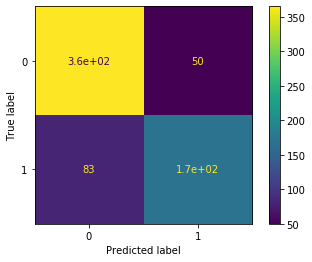

In [72]:
# visualize True/False Positives (labeled as 1) and True/False Negatives (labeled as 0), of which the numbers are used for above calculations.

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(m, X, y_train)

In [34]:
## plotting Receiver-Operator-Curve (as the trade-of between True-/False Positive Rates for varying thresholds)  
## plotting Precision-Recall-Curve (as) the trade-of between FalsePositives (precision) and missing TP (recall)

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve

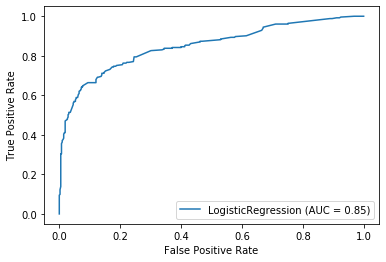

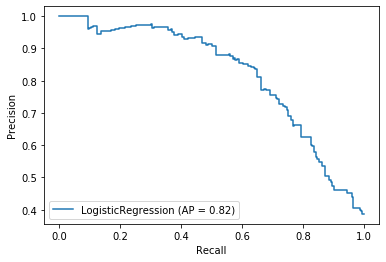

In [35]:
plot_roc_curve(m, X, y_train)
plot_precision_recall_curve(m, X, y_train)